$\phi$

$$x\left(t_{s}+\triangle
t\right)=x\left(t_{s}\right)+v\left(t_{s}\right)\triangle t+\frac{1}{2m}\,
   F\left(t_{s}\right)\triangle t^{2}\,.$$

In [12]:
def vv_posicion(x, v, F, m, dt):
    
    x_next = x       +    v*dt     +      (1/2*m)*F*dt**2
    
    print(x_next)
    
    return "otra cosa"


valor = vv_posicion(0.0, 0.0, 2.0, 1.0, 0.01)

0.0001


In [20]:
def vv_posicion(x, v, F, m, dt):
    
    return x + v*dt + (1/2*m)*F*dt**2

valor = vv_posicion(0.0, 0.0, 2.0, 1.0, 0.01)
valor

0.0001

$$v\left(t_{s}+\triangle
   t\right)=v\left(t_{s}\right)+\frac{1}{2m}\,\left[F\left(t_{s}+\triangle
   t\right)+F\left(t_{s}\right)\right]\triangle t\,.$$

1) Calcular la posición $x(t_{s} + \triangle t)$ <br>
2) Evaluar $F(t_{s} + \triangle t)$, que realmente es:  $F(x(t_{s} + \triangle t))$, la fuerza depende de la posición <br>
3) Calcular la velocidad $v(t_{s} + \triangle t)$ <br>
4) Actualizar el tiempo $t_{s} = t_{s} + \triangle t$ <br>
5) Regresar al paso 1

$$m\cfrac{d^{2}x}{dt^{2}}=-\cfrac{k}{m}x$$

Suponiendo que se conoce la fuerza $F(t_{s})$, la posición $x(t_{s})$ y la velocidad $v(t_{s})$, el algoritmo que se utiliza en el método de Velocity-Verlet, es el siguiente:

In [26]:
import pandas as pd
import numpy as np

def vv_posicion(x, v, F, m, dt):
    x_next = x       +    v*dt     +      (1/2*m)*F*dt**2
    return x_next

def vv_velocidad(v, F_anterior, F_actual, m, dt):
    
    v_next = v + np.divide(F_anterior + F_actual, 2*m)*dt
    
    return v_next

def fr(x, k, m):
    
    return (-1)*np.divide(k, m)*x


k = 1.0
m = 1.0

x0 = 2.0 # determina la energia total
v0 = 0.0
f0 = fr(x0, k, m)
t0 = 0.0

dt = 0.01

steps = 1000
for i in range(steps):
    
    x = vv_posicion(x, v, F, m, dt)
    f = fr(x, k, m)
    v = vv_velocidad(v, F_anterior, F_actual, m, dt)
    t+=dt
    #t = t0 + i*dt
    
    
    



In [13]:
import pandas as pd
import numpy as np

def vv_posicion(x, v, F, m, dt):
    x_next = x       +    v*dt     +      (1/2*m)*F*dt**2
    return x_next

def vv_velocidad(v, F_anterior, F_actual, m, dt):
    
    v_next = v + np.divide(F_anterior + F_actual, 2*m)*dt
    
    return v_next

def fr(x, k, m):
    
    return (-1)*np.divide(k, m)*x


k = 1.0
m = 1.0

x0 = 2.0 # determina la energia total
v0 = 0.0
f0 = fr(x0, k, m)
t0 = 0.0

dt = 0.01

sol = {} #inicializo dicionario

sol['t'] = {}
sol['x'] = {}
sol['v'] = {}
sol['f'] = {}

idx = 0
sol['t'][idx] = t0
sol['x'][idx] = x0
sol['v'][idx] = v0
sol['f'][idx] = f0

steps = 1000
for i in range(steps):
    
    # valores anteriores
    t = sol['t'][idx]
    x = sol['x'][idx]
    v = sol['v'][idx]
    fa = sol['f'][idx]   #fuerza anterior
    
    x = vv_posicion(x, v, fa, m, dt) #posicion actual
    
    fb = fr(x, k, m)     #fuerza actual
    
    v = vv_velocidad(v, fa, fb, m, dt)
    
    t = t0 + i*dt
    
    # valores actutales
    idx+=1
    sol['t'][idx] = t
    sol['x'][idx] = x
    sol['v'][idx] = v
    sol['f'][idx] = fb
    
    
    

df = pd.DataFrame(sol)
path = "solucion_resorte.pkl"
df.to_pickle(path)

In [3]:
df.head(10)

,t,x,v,f
0,0.00,2.000000,0.000000,-2.000000
1,0.00,1.999900,-0.019999,-1.999900
2,0.01,1.999600,-0.039997,-1.999600
3,0.02,1.999100,-0.059991,-1.999100
4,0.03,1.998400,-0.079978,-1.998400
5,0.04,1.997500,-0.099958,-1.997500
6,0.05,1.996401,-0.119927,-1.996401
7,0.06,1.995102,-0.139885,-1.995102
8,0.07,1.993603,-0.159828,-1.993603
9,0.08,1.991905,-0.179756,-1.991905


In [4]:
import matplotlib.pyplot as plt

In [ ]:
!conda install -c conda-forge matplotlib -y

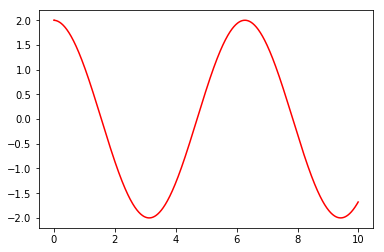

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

x = df['x'].values
t = df['t'].values

plt.plot(t, x, 'r')

plt.show()

$$x\left(t\right)=A\cos\left(\omega t+\phi\right)$$

In [11]:
np.sqrt(4)

2.0

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib tk

def solx(t, A, k, m):
    return A*np.cos(np.sqrt(np.divide(k, m))*t)

path = "solucion_resorte.pkl"
df = pd.read_pickle(path)

k = 1.0
m = 1.0
x0 = 2.0 # determina la energia total
A = x0

t = df['t'].values
xvv = df['x'].values
xsol = solx(t, A, k, m)

plt.plot(t, xsol, 'r') #rojo solucion analitica
plt.plot(t, xvv, 'b') # sol de vverlet
plt.show()